In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from d3blocks import D3Blocks
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',1000)

# Importing Data

In [2]:
data = pd.read_csv(r'/media/abhinav/Data/MGP-themlco/Road Traffic severity classification/RTA Dataset.csv',low_memory=False)
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# EDA

In [3]:
# checking for null values
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

## Univariate Analysis

In [48]:
data['Time']

0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object

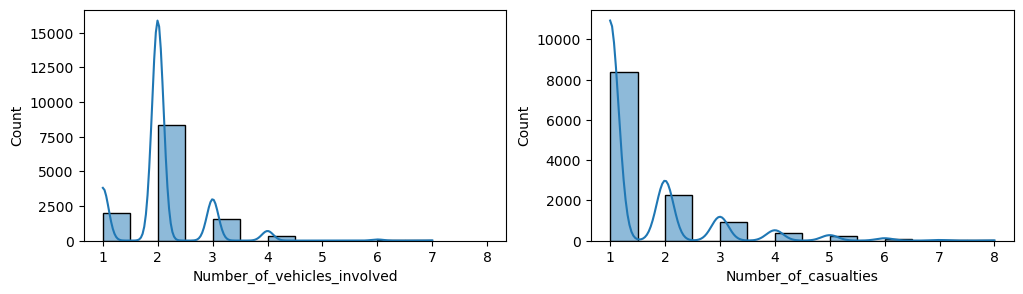

In [21]:
fig, ax = plt.subplots(1,2,figsize=(12,3),sharex=True)
sns.histplot(data = data,x = 'Number_of_vehicles_involved',kde=True,ax=ax[0],binwidth=0.5)
sns.histplot(data = data,x = 'Number_of_casualties',kde=True,ax=ax[1],binwidth=0.5)
plt.show()

Both the numerical variables follows a discrete distribution instead of a continous one. so its good to categorize them for further analysis.

## Bivariate Analysis

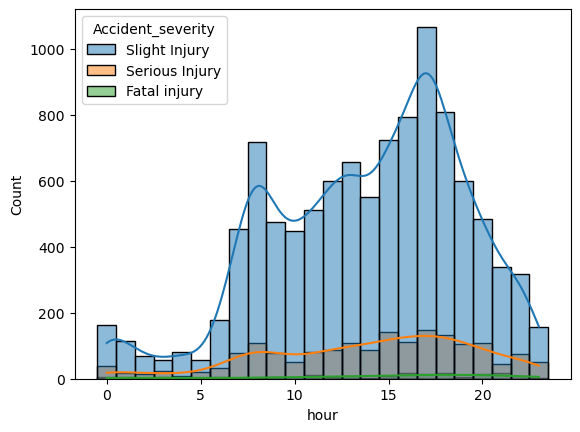

In [96]:
data[['hour','min']] = data['Time'].astype(str).str.split(":",n=1,expand=True)
data['hour'] = data['hour'].astype(int)
sns.histplot(data=data,x='hour',hue='Accident_severity',discrete=True,binwidth=0.1,bins = 200,kde=True)
plt.show()

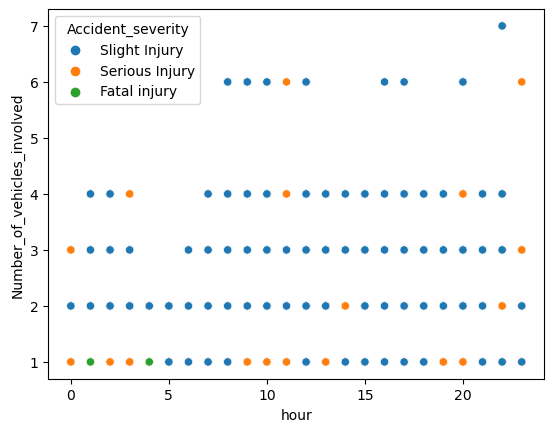

In [100]:
sns.scatterplot(data=data,x='hour',y = 'Number_of_vehicles_involved',hue ='Accident_severity' )
plt.show()

its interesting to note that most of the accidents with Fatal, serious injuries are happening between 12-5am and only involving one vehicle.

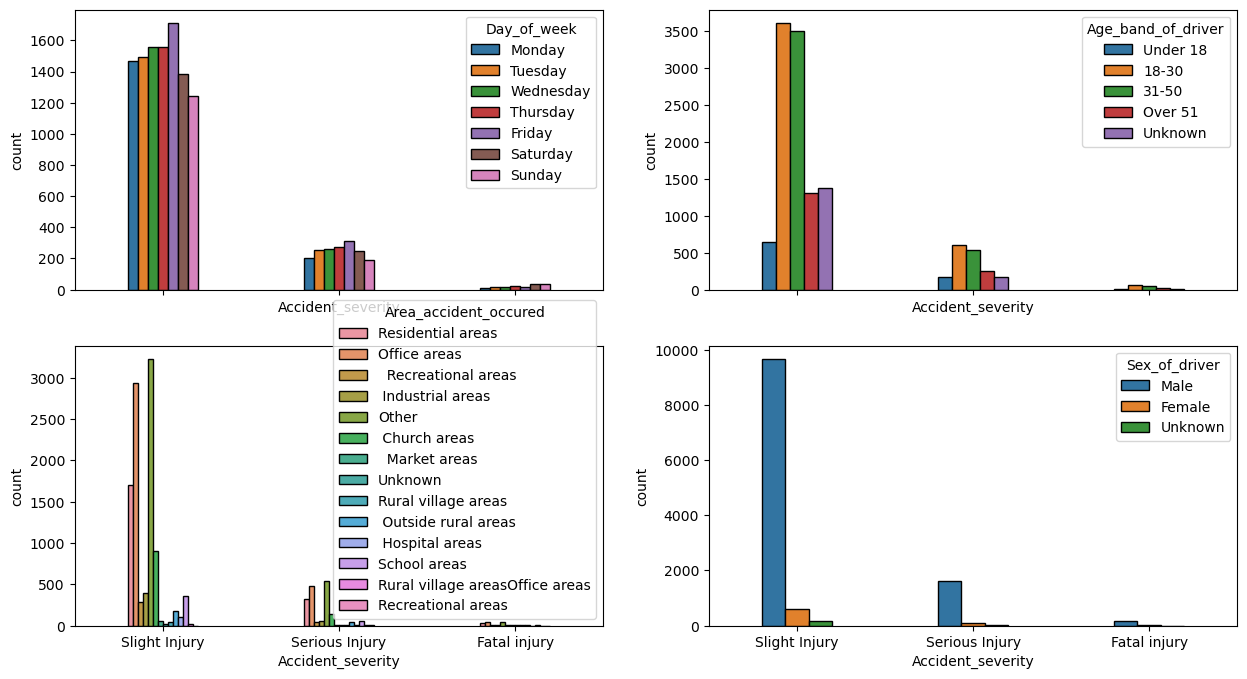

In [116]:
fig,ax = plt.subplots(2,2,figsize=(15,8),sharex=True)
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Day_of_week',
              hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ax=ax[0,0])
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Age_band_of_driver',
              hue_order=['Under 18','18-30','31-50' ,'Over 51','Unknown'],ax=ax[0,1])
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Sex_of_driver',
              hue_order=['Male','Female','Unknown'],ax=ax[1,1])
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Area_accident_occured',
            ax=ax[1,0])
plt.show()


In [45]:
for col in data.select_dtypes(exclude='number').columns:
    print(col)
    print(data[col].unique())

Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver
['Male' 'Female' 'Unknown']
Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle
['Owner' 'Governmental' nan 'Organization' 'Other']
Service_year_of_vehicle
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'B

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Day_of_week',
              'Age_band_of_driver',
              'Sex_of_driver',
              'Road_surface_conditions',
              'Light_conditions',
              'Weather_conditions',
              'Accident_severity'],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()